In [2]:
import chardet

def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        raw_data = f.read()
        result = chardet.detect(raw_data)
        return result['encoding']

file_path = 'yuanqu.json'
detected_encoding = detect_encoding(file_path)
print(f"Detected encoding: {detected_encoding}")

Detected encoding: utf-8


In [3]:
import json
import jieba
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import pandas as pd
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

In [4]:
# 手动添加的停用词列表
manual_stopwords = {
    '一个', '今日', '下', '做', '儿', '死', '人', '休', '下','孩儿','里','是','做', '无','听'
    # 添加更多您认为需要排除的词汇
}

In [5]:
def load_stopwords(file_path):
    """
    从文件导入停用词表，并合并手动添加的停用词。
    
    :param file_path: 停用词文件路径
    :return: 合并后的停用词集合
    """
    with open(file_path, 'r', encoding='gbk') as f:
        stopwords = f.read().splitlines()
    # 将文件中的停用词转换为集合，并与手动添加的停用词合并
    return set(stopwords).union(manual_stopwords)

# 文本预处理函数（使用 jieba 进行分词）
def preprocess_text(text, stop_words):
    words = jieba.lcut(text)
    filtered_words = [word for word in words if word.strip() and word not in stop_words]
    return ' '.join(filtered_words)

# 加载JSON文件中的元曲数据
def load_json_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

In [20]:
# 主程序
if __name__ == "__main__":
    # 加载停用词
    stop_words = load_stopwords("stop_words.txt")

    # 加载元曲数据
    file_path = 'yuanqu.json'
    data = load_json_data(file_path)

    # 整理成文档列表
    documents = ['\n'.join(item['paragraphs']) for item in data]

    # 预处理文档
    processed_documents = [preprocess_text(doc, stop_words) for doc in documents]

    # 创建文档-词项矩阵
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, token_pattern=r"(?u)\b\w+\b")
    dtm = vectorizer.fit_transform(processed_documents)
    vocabulary = vectorizer.get_feature_names_out()

    # 应用LDA模型
    num_topics = 10  
    lda_model = LDA(n_components=num_topics, random_state=42,learning_method='online',evaluate_every=1,verbose=1,)
    lda_model.fit(dtm)

    # 显示每个主题的前10个词
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words_indices = topic.argsort()[-10:][::-1]
        top_words = [vocabulary[i] for i in top_words_indices]
        print(f"Topic {topic_idx}: {' '.join(top_words)}")

    # 可视化文档-主题分布
    doc_topic_distrib = lda_model.transform(dtm)
    df_doc_topic = pd.DataFrame(doc_topic_distrib, columns=[f'Topic {i}' for i in range(num_topics)])
    print("\nDocument-Topic Distribution:")
    print(df_doc_topic)

iteration: 1 of max_iter: 10, perplexity: 16923.1128
iteration: 2 of max_iter: 10, perplexity: 15411.4860
iteration: 3 of max_iter: 10, perplexity: 14864.3518
iteration: 4 of max_iter: 10, perplexity: 14478.7118
iteration: 5 of max_iter: 10, perplexity: 14158.9938
iteration: 6 of max_iter: 10, perplexity: 13885.6273
iteration: 7 of max_iter: 10, perplexity: 13644.9307
iteration: 8 of max_iter: 10, perplexity: 13439.7618
iteration: 9 of max_iter: 10, perplexity: 13267.9493
iteration: 10 of max_iter: 10, perplexity: 13127.1513
Topic 0: 唱 道 正末 似 甚 住 问 却 老云 醉
Topic 1: 云 唱 正旦 正末 正末云 说 道 好 怎生 哥哥
Topic 2: 旦 净 丑 生 末 说 外 合 老旦 想
Topic 3: 月 绣 梦 相思 愁 风流 鸳鸯 笑 恨 春
Topic 4: 说 甚 似 早 道 再 难 好 中 恨
Topic 5: 似 道 甚 唱 说 好 小生 中 这般 再
Topic 6: 旦 生 外 合 说 合前 净 末 贴 哥哥
Topic 7: 唱 正末 云 道 想 似 只 中 先生 元帅
Topic 8: 唱 云 正末 道 正旦 哥哥 正末云 好 兄弟 说
Topic 9: 似 再 甚 后 酒 道 天 只 笑 难

Document-Topic Distribution:
        Topic 0   Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6  \
0      0.007695  0.007694  0.007693  0.007694

iteration: 1 of max_iter: 10, perplexity: 18150.1086
iteration: 2 of max_iter: 10, perplexity: 14732.4446
iteration: 3 of max_iter: 10, perplexity: 14056.5838
iteration: 4 of max_iter: 10, perplexity: 13802.3538
iteration: 5 of max_iter: 10, perplexity: 13678.5680
iteration: 6 of max_iter: 10, perplexity: 13606.3278
iteration: 7 of max_iter: 10, perplexity: 13559.3268
iteration: 8 of max_iter: 10, perplexity: 13527.0962
iteration: 9 of max_iter: 10, perplexity: 13503.4964
iteration: 10 of max_iter: 10, perplexity: 13485.7780
Topic #0: 恁 似 笑 功名 中 忒 英雄 孤 觑 玉
Topic #1: 旦 合 生 喜 王 真 一声 老旦 话 年
Topic #2: 将军 刘 吾 长安 归来 背 四海 包 待制 浅
Topic #3: 月 愁 醉 风流 恨 绣 春 闲 梦 西风
Topic #4: 甚 厮 说 些 道 劝 莺 再 官人 末云
Topic #5: 少 臣 寻 亲 媳妇 须 入 后 新 旧
Topic #6: 生 净 外 末 丑 酒 花 处 小生 后
Topic #7: 走 甚 道 想 苦 寻思 手 回 锦 赏
Topic #8: 唱 云 正末 正旦 道 正末云 说 好 哥哥 似
Topic #9: 日 莫不是 东风 相逢 只 海棠 只怕 一半儿 枕 弄



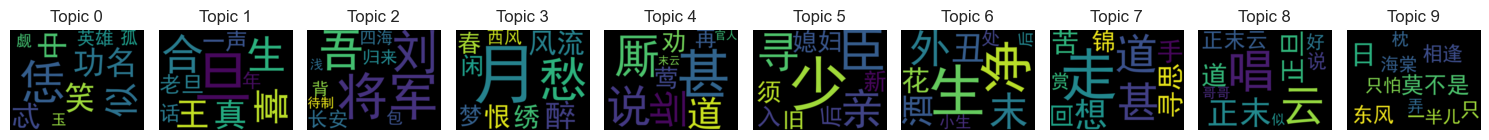

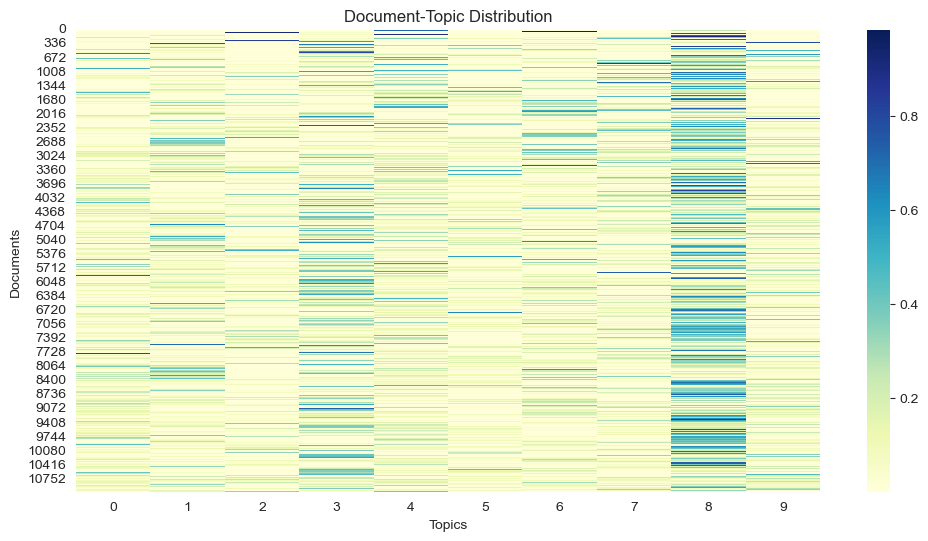

In [18]:
# 获取词袋模型中的所有词
docres = lda_model.fit_transform(dtm)
feature_names = vectorizer.get_feature_names_out()
K=10
# 打印每个主题的前 10 个关键词
n_top_words = 10
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx}: "
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
print_top_words(lda_model, feature_names, n_top_words)
# 获取每个主题的词频分布
lamda = lda_model.components_

# 获取词到索引的映射
word2id = {word: idx for idx, word in enumerate(feature_names)}

# 获取每个主题的前 N 个关键词
topicwords = []
for topic in lamda:
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    topicwords.append([feature_names[i] for i in top_features_ind])

# 绘制词云
plt.figure(figsize=(15, 10))
for k in range(K):
    plt.subplot(5,10, k + 1)  # 根据主题数量调整 subplot 参数
    wordcloud = WordCloud(font_path='simhei.ttf', width=400, height=300).generate_from_frequencies(
        {word: lamda[k, word2id[word]] for word in topicwords[k]}
    )
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {k}')
    plt.axis('off')

plt.tight_layout()
plt.show()
# 文档-主题分布矩阵 alpha 已经通过 docres 获得
alpha = docres

# 绘制热图
plt.figure(figsize=(12, 6))
sns.heatmap(alpha, cmap='YlGnBu')
plt.title('Document-Topic Distribution')
plt.xlabel('Topics')
plt.ylabel('Documents')
plt.show()

In [19]:
# 获取每个词在整个语料库中的总频率
term_frequency = dtm.sum(axis=0).A1

# 获取文档长度（即每个文档中词汇的总数量）
doc_lengths = dtm.sum(axis=1).A1
# 准备 LDA 可视化数据
data = pyLDAvis.prepare(lda_model.components_, 
                        doc_topic_dists=docres,
                        vocab=feature_names, 
                        term_frequency=term_frequency,
                        doc_lengths=doc_lengths,
                        mds='tsne')
# 如果你在 Jupyter Notebook 中工作，可以使用 enable_notebook()
pyLDAvis.enable_notebook()

# 显示可视化面板
pyLDAvis.display(data)


In [11]:
lda_model.bound_

34984.979478457906